In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [53]:
#Loading the dataset
customer_df =pd.read_csv('marketing_campaign.csv',delimiter='\t') #/marketing_campaign.csv
customer_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [54]:
#Number of rows and columns
customer_df.shape

(2240, 29)

In [55]:
customer_df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [56]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

We need to change the dt_customer to date time format.

## Data Cleaning

In [57]:
#Number of missing values in Income
customer_df['Income'].isnull().sum()

24

In [58]:
#Deleting null values
customer_df.dropna(inplace=True)

In [59]:
#Changing dt_customer to datetime format
customer_df['Dt_Customer'] = pd.to_datetime(customer_df['Dt_Customer'],dayfirst=True)

In [60]:
#Creating New features
#Total spent by a customer over the last 2 years on every product
Total_Spendings = customer_df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis=1)
customer_df['Total_Spendings'] = Total_Spendings

#Number of children in the household
customer_df['Number_of_children'] = customer_df['Kidhome'] + customer_df['Teenhome']

#Number of days a customer has been in the database
customer_df['Customer_Tenure'] = (customer_df['Dt_Customer'].max() - customer_df['Dt_Customer']).dt.days

#Age of the customer
customer_df['Age'] = 2014 - customer_df['Year_Birth']

#Family Size using marital status if married 2 single 1

customer_df['Relationship_status']=customer_df['Marital_Status'].replace({'Married':2,'Together':2,'Single':1,'Divorced':1,'Widow':1,'YOLO':1,'Absurd':1,'Alone':1})

#Convering from object to integer
customer_df['Relationship_status'].astype(int)

#customer_df['Family_Size'] = np.where(customer_df['Relationship_status'] == 'With Partner', 2, 1) + customer_df['Number_of_children']
#customer_df['Relationship_status']=customer_df['Relationship_status'].replace({'Alone':1,'With Partner':2})

customer_df['Family_Size'] = customer_df['Relationship_status'] + customer_df['Number_of_children']


In [61]:
print('Latest Customer:',customer_df['Dt_Customer'].max())
print('Oldest Customer:',customer_df['Dt_Customer'].min())

Latest Customer: 2014-06-29 00:00:00
Oldest Customer: 2012-07-30 00:00:00


We need to drop some columns that are not necessary in clustering and are redundant

In [62]:
#Dropping columns
customer_df.drop(columns=['ID','Dt_Customer','Year_Birth','Marital_Status','Education','Z_CostContact','Z_Revenue'],inplace=True)

In [63]:
customer_df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Spendings,Number_of_children,Customer_Tenure,Age,Relationship_status,Family_Size
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,607.075361,0.947202,353.521209,45.179603,1.645307,2.592509
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,602.900476,0.749062,202.434667,11.985554,0.478528,0.905722
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,18.000000,1.000000,1.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000,180.000000,37.000000,1.000000,2.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,396.500000,1.000000,355.500000,44.000000,2.000000,3.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,1048.000000,1.000000,529.000000,55.000000,2.000000,3.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,2525.000000,3.000000,699.000000,121.000000,2.000000,5.000000


#Checking Outliers

Income -Min and Max values are far from the mean value.

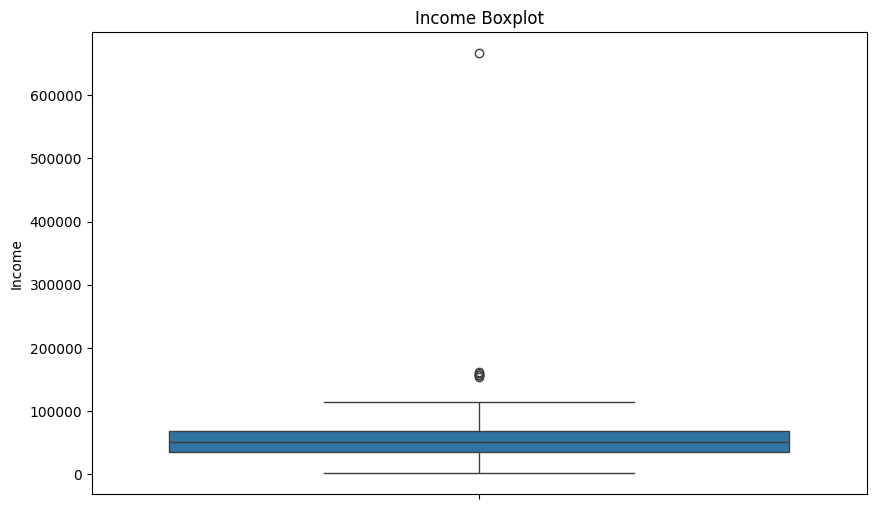

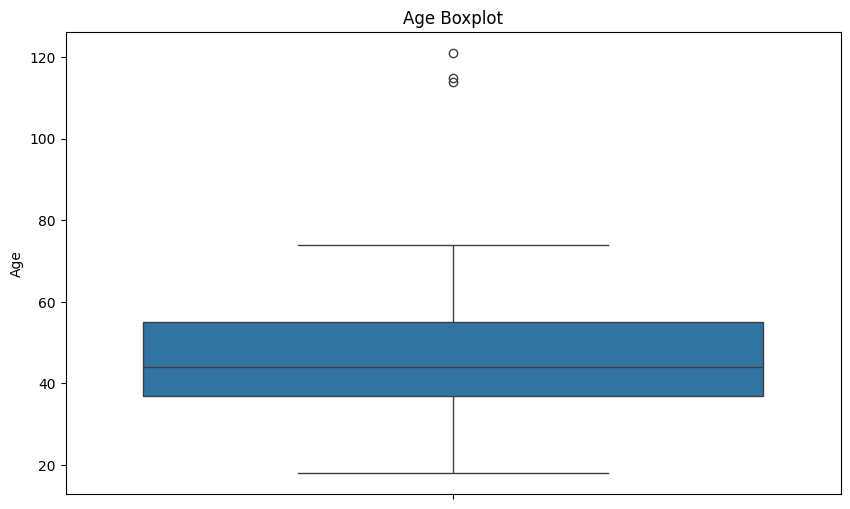

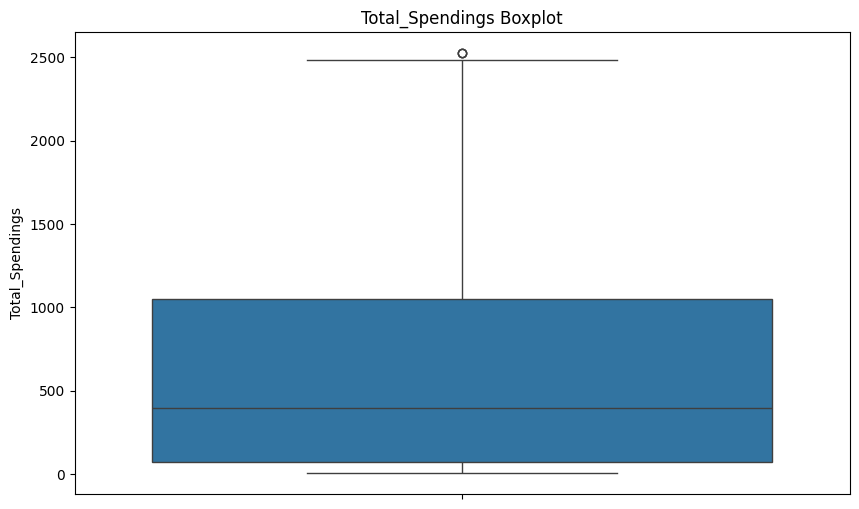

In [64]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(data=customer_df['Income'])
plt.title('Income Boxplot')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(data=customer_df['Age'])
plt.title('Age Boxplot')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(data=customer_df['Total_Spendings'])
plt.title('Total_Spendings Boxplot')
plt.show()


In [65]:
#Number of Outliers in Income
Q1 = customer_df['Income'].quantile(0.25)
Q3 = customer_df['Income'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = customer_df[(customer_df['Income'] < lower_bound) | (customer_df['Income'] > upper_bound)]
print("Number of outliers in Income:", outliers.shape[0])

Number of outliers in Income: 8


In [66]:
#Number of Outliers in Age
Q1 = customer_df['Age'].quantile(0.25)
Q3 = customer_df['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = customer_df[(customer_df['Age'] < lower_bound) | (customer_df['Age'] > upper_bound)]
print("Number of outliers in Age:", outliers.shape[0])

Number of outliers in Age: 3


In [67]:
#Number of Outliers in Total_spending
Q1 = customer_df['Total_Spendings'].quantile(0.25)
Q3 = customer_df['Total_Spendings'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = customer_df[(customer_df['Total_Spendings'] < lower_bound) | (customer_df['Total_Spendings'] > upper_bound)]
print("Number of outliers in Total_Spendings:", outliers.shape[0])

Number of outliers in Total_Spendings: 3


In [68]:
#Capping to reduce the outliers
customer_df['Income_Capped'] = customer_df['Income'].clip(lower=lower_bound, upper=upper_bound)
customer_df['Age_Capped'] = customer_df['Age'].clip(lower=lower_bound, upper=upper_bound)
customer_df['Total_Spendings_Capped'] = customer_df['Total_Spendings'].clip(lower=lower_bound, upper=upper_bound)

In [69]:
customer_df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Response,Total_Spendings,Number_of_children,Customer_Tenure,Age,Relationship_status,Family_Size,Income_Capped,Age_Capped,Total_Spendings_Capped
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.150271,607.075361,0.947202,353.521209,45.179603,1.645307,2.592509,2516.113718,45.179603,607.064305
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.357417,602.900476,0.749062,202.434667,11.985554,0.478528,0.905722,16.772032,11.985554,602.865369
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,5.000000,0.000000,0.000000,18.000000,1.000000,1.000000,1730.000000,18.000000,5.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,69.000000,0.000000,180.000000,37.000000,1.000000,2.000000,2516.500000,37.000000,69.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,396.500000,1.000000,355.500000,44.000000,2.000000,3.000000,2516.500000,44.000000,396.500000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,1048.000000,1.000000,529.000000,55.000000,2.000000,3.000000,2516.500000,55.000000,1048.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,2525.000000,3.000000,699.000000,121.000000,2.000000,5.000000,2516.500000,121.000000,2516.500000


In [70]:
#dropping columns
customer_df_cln= customer_df.drop(columns=['Income','Age','Total_Spendings','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Number_of_children', 'Relationship_status'])

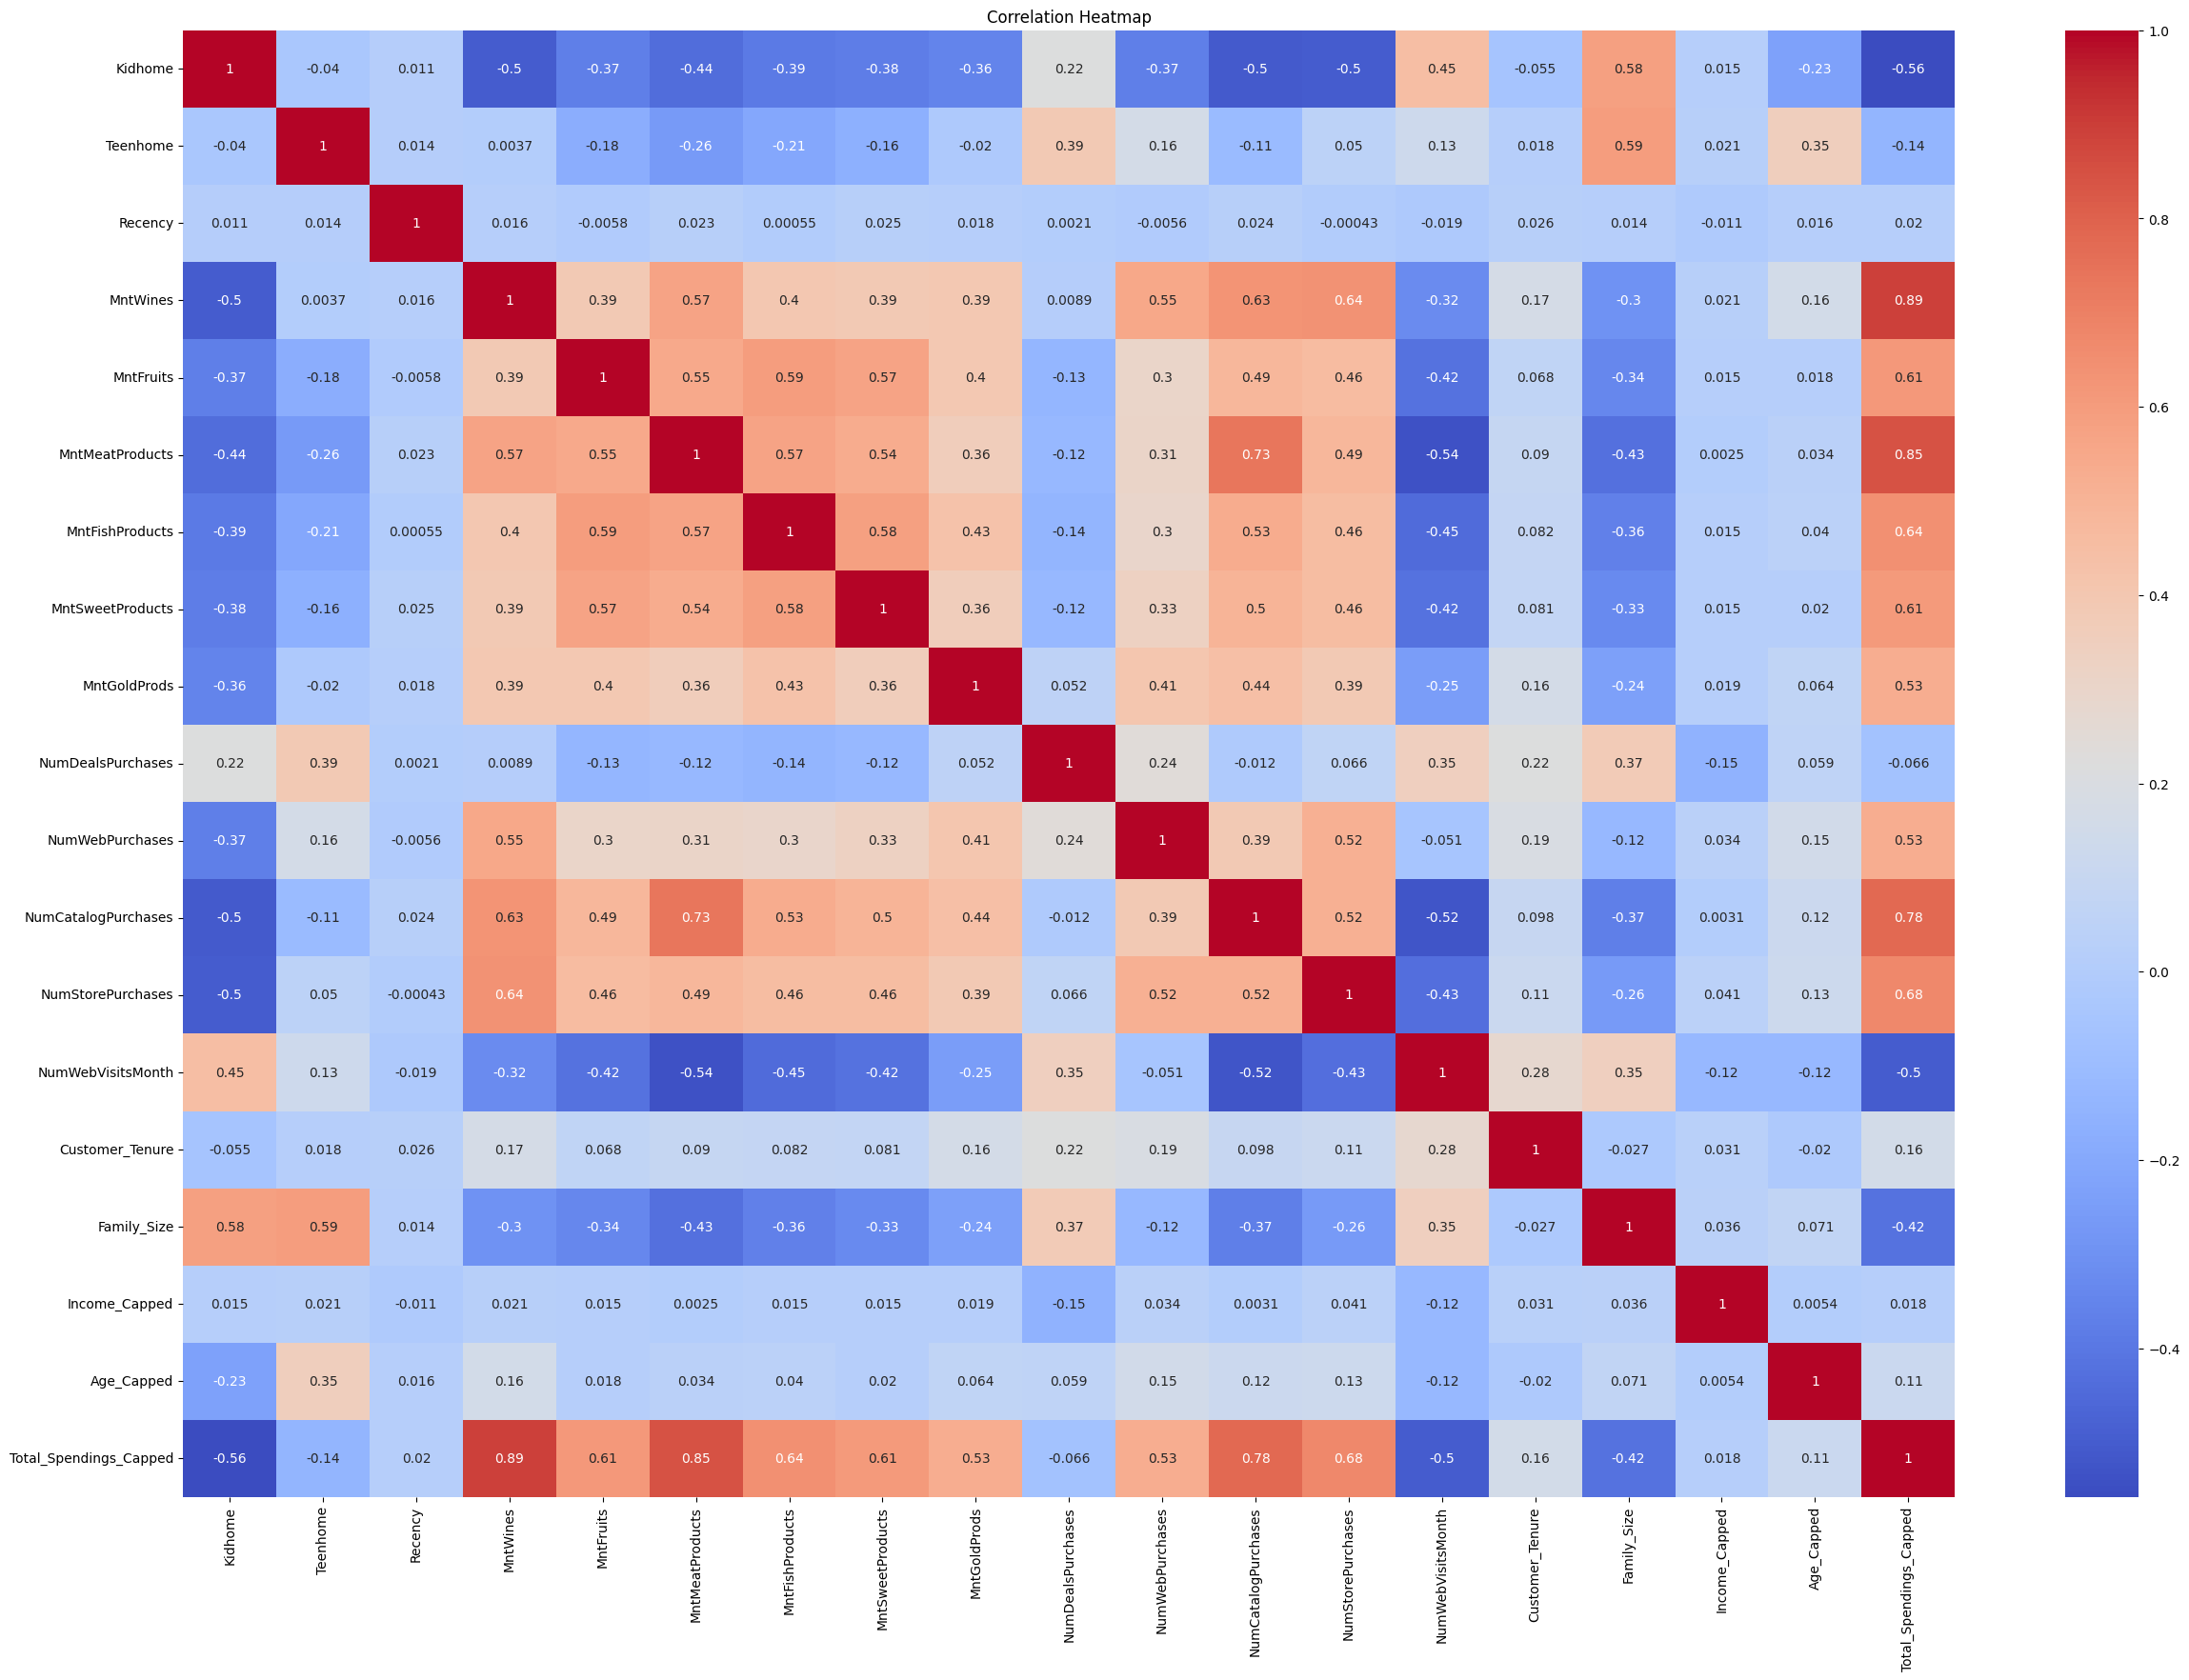

In [71]:
#heatmap to check correlation
plt.figure(figsize=(30, 20))
sns.heatmap(customer_df_cln.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Determining Number of Clusters

In [72]:
customer_df_cln.columns

Index(['Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Customer_Tenure', 'Family_Size', 'Income_Capped', 'Age_Capped',
       'Total_Spendings_Capped'],
      dtype='object')

In [73]:
#Scaling the data

# Standardizing the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_df_cln)


In [74]:
from sklearn.decomposition import PCA

# Applying PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
pca_data = pca.fit_transform(scaled_data)

# Checking the explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)
print("Total Variance Explained:", sum(explained_variance))


Explained Variance Ratio: [0.3550688  0.11874602 0.0746709  0.05565527 0.05426947 0.05255677
 0.04335456 0.03933959 0.03367664 0.03023713 0.02715445 0.02348257
 0.02207274 0.02057905]
Total Variance Explained: 0.9508639795014904


In [75]:
explained_variance_df=pd.DataFrame(explained_variance, columns=["Variance explained"])
explained_variance_df

,Variance explained
0,0.355069
1,0.118746
2,0.074671
3,0.055655
4,0.054269
5,0.052557
6,0.043355
7,0.039340
8,0.033677
9,0.030237


In [76]:
cumulative_sum_of_variance = np.cumsum(explained_variance)

cumulative_sum_of_variance

array([0.3550688 , 0.47381483, 0.54848573, 0.604141  , 0.65841047,
       0.71096724, 0.7543218 , 0.79366139, 0.82733803, 0.85757517,
       0.88472961, 0.90821219, 0.93028493, 0.95086398])

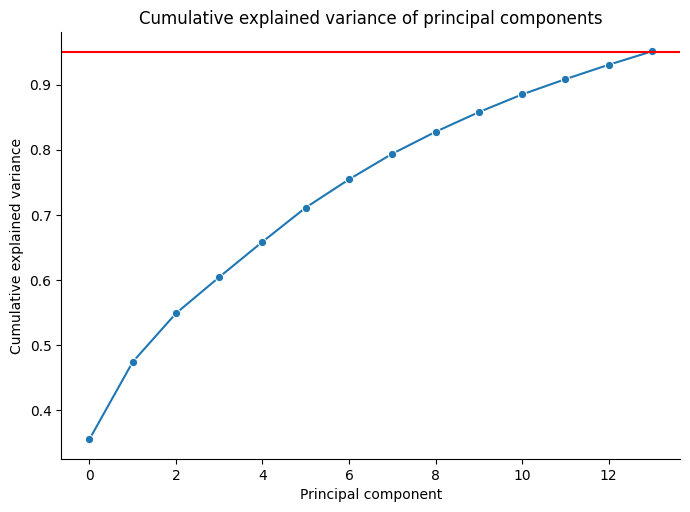

In [77]:

(
  # Creating a cumulative explained variance plot
  sns.relplot(
      kind = "line",  # Create a line plot
      x = range(len(explained_variance)),  # Set the x-axis to be the principal component index
      y = cumulative_sum_of_variance,  # Set the y-axis to be the cumulative explained variance
      marker = "o",  # Use a circle marker for the data points
      aspect = 1.4,  # Set the aspect ratio of the plot to be 1.4
  )
  # Setting the title of the plot
  .set(title = "Cumulative explained variance of principal components")
  # Set the axis labels
  .set_axis_labels("Principal component", "Cumulative explained variance")
);

# Adding a horizontal red line at 0.95 on the y axis
plt.axhline(y = 0.95,
            color = 'red');

PCA Components - 12 components found

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

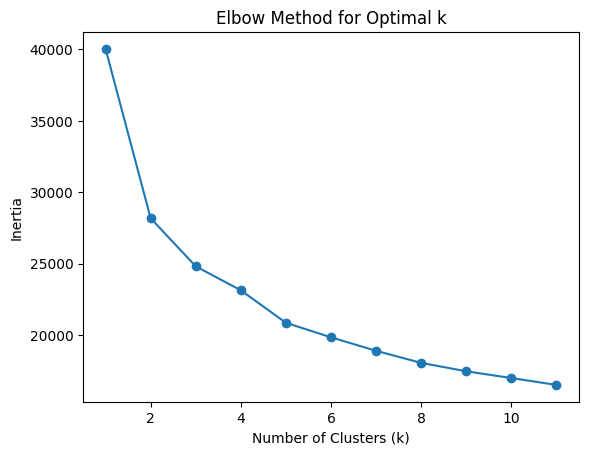

In [78]:

inertia = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_data)
    inertia.append(kmeans.inertia_)

# Plotting the elbow method
plt.plot(range(1, 12), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show();


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

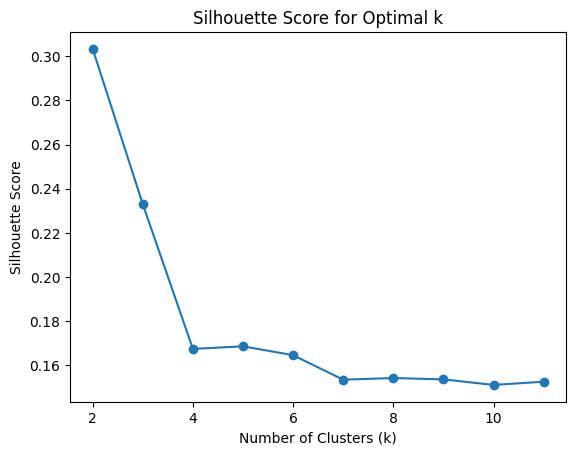

In [79]:

from sklearn.metrics import silhouette_score

# Calculatng silhouette scores for different number of clusters
silhouette_scores = []
for i in range(2, 12):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_data)
    silhouette_scores.append(silhouette_score(pca_data, kmeans.labels_))

# Plotting the silhouette scores
plt.plot(range(2, 12), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()


3 clusters is optimal for both Inertia and Silhoutte scores

In [80]:
#Using the Optimal number of clusters - 3
kmeans = KMeans(n_clusters=3, random_state=42)
customer_df_cln['clusters'] = kmeans.fit_predict(pca_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [81]:
customer_df_cln['clusters']=kmeans.labels_

In [82]:
#Count of the clusters
customer_df_cln['clusters'].value_counts()

,count
clusters,
0,1066
1,589
2,561


In [ ]:
# Grouping by cluster and calculating mean values for each feature
cluster_analysis = customer_df_cln.groupby('clusters').mean()

cluster_analysis


In [84]:
customer_df_cln.to_csv('customer_df_cln_with_index.csv', index=True)


In [90]:
categories = list(cluster_analysis.columns)
N = len(categories)


In [91]:
N

19

In [87]:
cluster_labels= cluster_analysis.index

In [98]:
import plotly.graph_objects as go
from math import pi

# Defining the features to display
selected_features = ['Customer_Tenure', 'Family_Size', 'Income_Capped', 'Age_Capped', 'Total_Spendings_Capped']

# Filtering the cluster_analysis DataFrame to only include the selected features
filtered_cluster_analysis = cluster_analysis[selected_features]

# Updating the categories list to match the selected features
categories = selected_features

# Number of variables we're plotting
N = len(categories)

# Calculating the  angle of each axis
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # close the loop

# Creating a list to hold the radar charts for each cluster
fig = go.Figure()

# Plotting each cluster
for i, cluster_label in enumerate(cluster_labels):
    values = filtered_cluster_analysis.loc[cluster_label].values.flatten().tolist()
    values += values[:1]  # to close the loop

    # Creating the radar chart for the current cluster
    fig.add_trace(go.Scatterpolar(
        r=values,
        theta=categories + [categories[0]],  # Close the loop by repeating the first category
        fill='toself',
        name=f'Cluster {cluster_label}'
    ))

# Setting the layout of the radar chart
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, filtered_cluster_analysis.values.max()]  # Set the range of the radial axis
        )
    ),
    showlegend=True,
    title="Interactive Radar Chart for Selected Customer Features"
)

# Displaying the interactive radar chart
fig.show()
